# Machine Learning

"Machine learning is the future." -- Google

"It's not magic. It's just a tool. But it's a really important tool." -- Google

## What is Machine Learning?

Machine learning is the process to automatically extract knowledge from data, usually with the goal of making predictions on new, unseen data. 

Central to machine learning is the concept of making decision automatically from data, without the user specifying explicit rules how this decision should be made.

The second central concept is generalization. The goal of a machine learning algorithm is to predict on new, previously unseen data. We are not interested in marking an email as spam or not, that the human already labeled. Instead, we want to make the users life easier by making an automatic decision for new incoming mail.

Set of algorithms with tunable parameters that can learn and adjust the values of these parameters from previously seen data and generalising for predictions of new yet unseen data.

Pattern Recognition, Statistical Data Modelling, Learning from Data, Deep Learning, Computational Statistics

image recognition, bank fraud detection, hand-writing recognition, find similarities


- supervised learning - training from data with known results
- unsupervised learning - finding structure and patterns in data without labels

### Supervised Learning

##### Regression

- fitting a line
- astronomy regression example, photometric redshift

non-trivial data analysis of large and/or multidimensional and/or complicated data sets

In [36]:
%matplotlib inline
import seaborn; seaborn.set()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

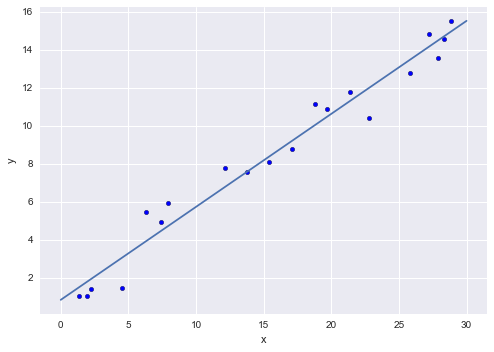

In [37]:
from fig_code import plot_linear_regression
plot_linear_regression()

 an example of fitting a model to data, such that the model can make generalizations about new data. The model has been learned from the training data, and can be used to predict the result of test data: here, we might be given an x-value, and the model would allow us to predict the y value.

##### Classification

The difference between classification and regression is that regression predicts continous values, while classification categorical classes (not necessary in same metrics).

Astronomy classification example, stars vs quasars, artefact finding

*The difference between a physicist and an astronomer: The physicist sees random 2D data and draws a curved line in it saying it’s the model that describes the data. The astronomer draws two parallel lines, saying these points belong to class A, these to class B and this is the class C.*

—- Andy Lawrence, private communication

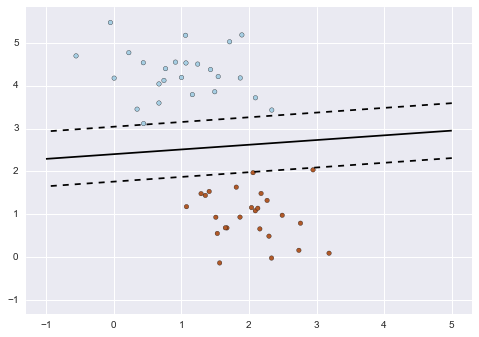

In [38]:
from fig_code import plot_sgd_separator
plot_sgd_separator()

You don't tell the algorithm which words are probably spam, you let the algorithm decide automatically for you based on examples of spams and hams

By drawing this separating line, we have learned a model which can generalize to new data: if you were to drop another point onto the plane which is unlabeled, this algorithm could now predict whether it's a blue or a red point.

Again, this can be really powerful high dimensions N = 1000. If human could see in more than 3 dimensions, we would not need machine learning

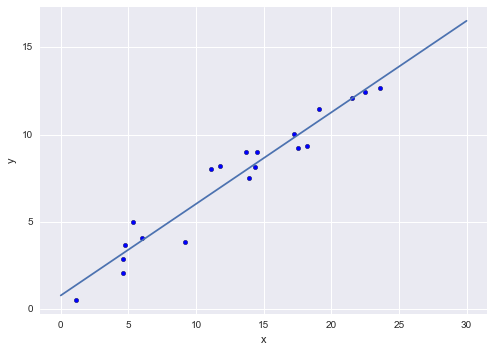

In [39]:
# %load fig_code/linear_regression.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def plot_linear_regression():
    a = 0.5
    b = 1.0

    # x from 0 to 10
    x = 30 * np.random.random(20)

    # y = a*x + b with noise
    y = a * x + b + np.random.normal(size=x.shape)

    # create a linear regression classifier
    clf = LinearRegression()
    clf.fit(x[:, None], y)

    # predict y from the data
    x_new = np.linspace(0, 30, 100)
    y_new = clf.predict(x_new[:, None])

    # plot the results
    ax = plt.axes()
    ax.scatter(x, y)
    ax.plot(x_new, y_new)

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.axis('tight')


if __name__ == '__main__':
    plot_linear_regression()
    plt.show()


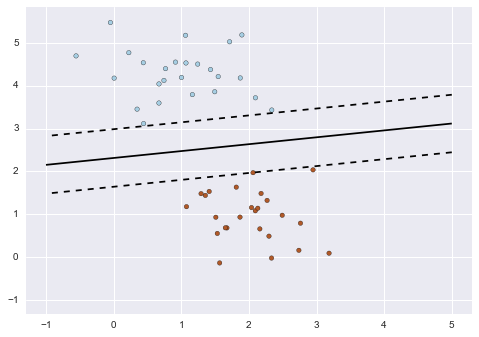

In [40]:
# %load fig_code/sgd_separator.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

def plot_sgd_separator():
    # we create 50 separable points
    X, Y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)

    # fit the model
    clf = SGDClassifier(loss="hinge", alpha=0.01,
                        n_iter=200, fit_intercept=True)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    xx = np.linspace(-1, 5, 10)
    yy = np.linspace(-1, 5, 10)

    X1, X2 = np.meshgrid(xx, yy)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = clf.decision_function([x1, x2])
        Z[i, j] = p[0]
    levels = [-1.0, 0.0, 1.0]
    linestyles = ['dashed', 'solid', 'dashed']
    colors = 'k'

    ax = plt.axes()
    ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

    ax.axis('tight')


if __name__ == '__main__':
    plot_sgd_separator()
    plt.show()


<img src="figures/ml-scheme.jpg" width="100%">

#### Essence of Machine Learning


- A pattern exists
- We cannot (or it is hard) to pin out analytically/mathematically
- We have data on it, enough data to learn

## Representation of data in scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be **[n_samples, n_features]**

### Features

- magnitudes in filters
- variability
- flare symmetry
- galaxy type
- RA, DEC
- 8x8 pixel representation of an object
- spectrum

data preparation

normalise, scale, centre, align, preprocesing, feature selection

curse of dimensionality

VC dimension, overfitting

### Basic scikit-learn scheme

Every ML algorithm in scikit-learn is an ''Estimator'' object. Initiated with ***hyperparameters***.

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


#### How to get help in scikit-learn?

ipython TAB+completition

function?

Great help with plenty of examples: http://scikit-learn.org

In [43]:
model?

In [44]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [45]:
# some dummy data
x = np.arange(10)
y = 2 * x + 1
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[ 1  3  5  7  9 11 13 15 17 19]


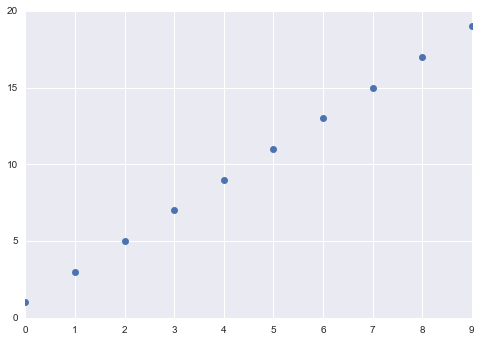

In [46]:
plt.plot(x, y, 'o');

In [47]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis]
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[ 1  3  5  7  9 11 13 15 17 19]


In [48]:
# fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [49]:
# underscore at the end indicates a fit parameter,
# each estimator can have different parameters
print(model.coef_)
print(model.intercept_)

[ 2.]
1.0


In [50]:
# residual error around fit
model.residues_

7.6200430943719212e-31

In [51]:
# use for prediction
x_new = np.array([1.5, 10])
X_new = x_new[:, np.newaxis]
model.predict(X_new)

array([  4.,  21.])

    X - 2D numpy array (matrix), #samples (#rows) x #featues (#columns)
    y - 1D column vector with y output values (or labels)

    clf = Model(algorithm_hyperparameter=value)
    clf.fit(X, y)
    clf.predict(X_new)

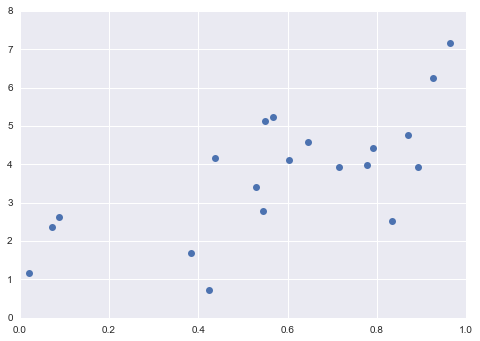

In [52]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

plt.plot(X.squeeze(), y, 'o');

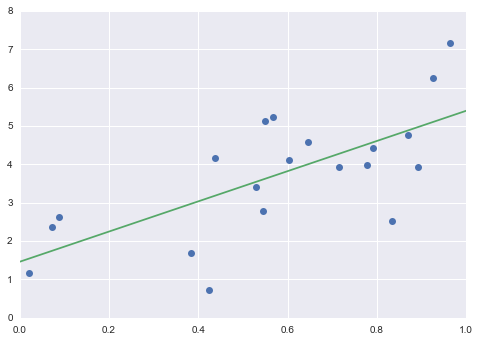

In [53]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

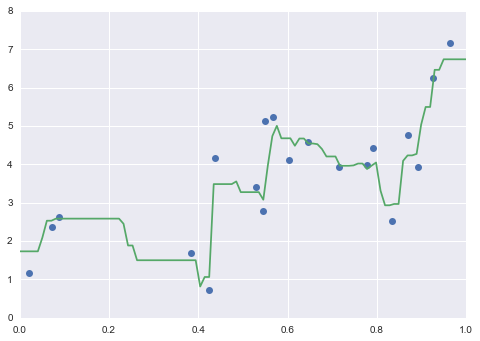

In [54]:
# Fit a Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

#### Exercise

Explore the ``RandomForestRegressor`` object using IPython's help features (i.e. put a question mark after the object).
What arguments are available to ``RandomForestRegressor``?
How does the above plot change if you change these arguments?

These class-level arguments are known as *hyperparameters*, and we will discuss later how you to select hyperparameters in the model validation section.

### Unsupervised Learning

####  Clustering and Dimensionality Reduction

- data has no labels
- finding similarities between the objects or patterns

How many different groups of gamma-ray bursts exist?

What parts of spectrum carry the most of information?

Outlier detection

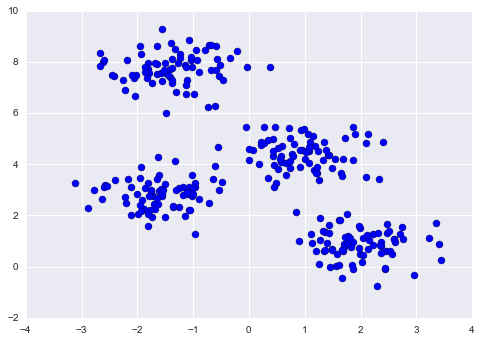

In [55]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
# X[:,0] *= 10.
plt.scatter(X[:, 0], X[:, 1], s=50);

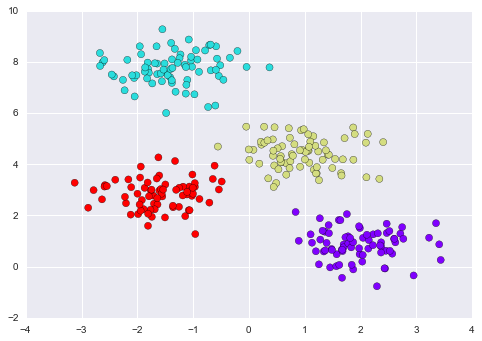

In [56]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

Testing is tricky, because we don't know the labels. We can check compactness of the clusters etc...

### Principal Component Analysis

find which directions in the data cloud are important = carry the most of information

In [57]:
# Read the data
datafile ='data/1_4_17_11_2013.csv'
data = np.genfromtxt(datafile , delimiter=',')
X, y = data[:,1:], data[:,0]
print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y)))

data shape: (1805, 778), target shape: (1805,)
classes: [1.0, 2.0, 3.0, 4.0]


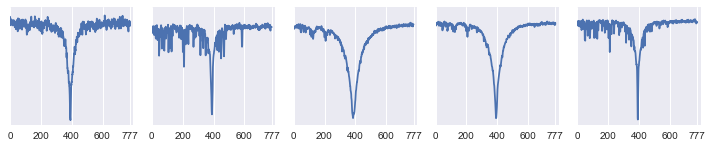

In [58]:
#Random 5 spectra from dataset
plt.figure(figsize=(10,10))
for i, j in enumerate(np.random.permutation(X.shape[0])[:5]):
    plt.subplot(5, 5, (i + 1))
    plt.plot(X[j])
    plt.xticks(([0, 200, 400, 600, 777])), plt.yticks(())
    plt.tight_layout()

In [59]:
from sklearn.decomposition import PCA
import sklearn.preprocessing as pp

X_scaled = pp.scale(X)

pca = PCA(778)
pca.fit(X_scaled)

PCA(copy=True, n_components=778, whiten=False)

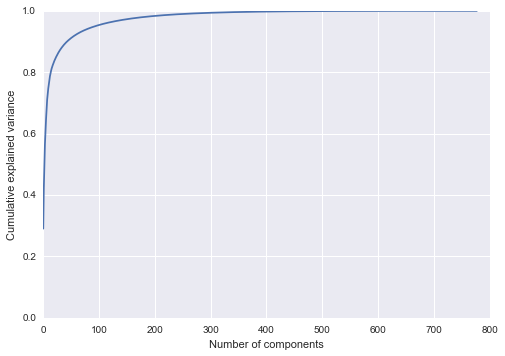

In [60]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.ylim(0., 1.00);

## Workflow

#### data mining
- get data

#### Preprocessing, feature selection
- transform data to scikit-learn friendly format
- select relevant feature
- **normalise, scale, centre** (e.g. KMeans clustering is very sensitive, try it!) 
- visualise

#### Choosing a hypothesis set, a class of models
- sniff data but be care don't snoop the data

#### Train the algorithm

with given hyper-parameters

on data with known results (or blindly in case of unsupervised learning)
 
#### Test the model with the result parameters

Update the hyperparameters to find the best fit... comparing the results with known results

#### Validate

#### Predict new results

## Classifiation comparison (An apetiser)

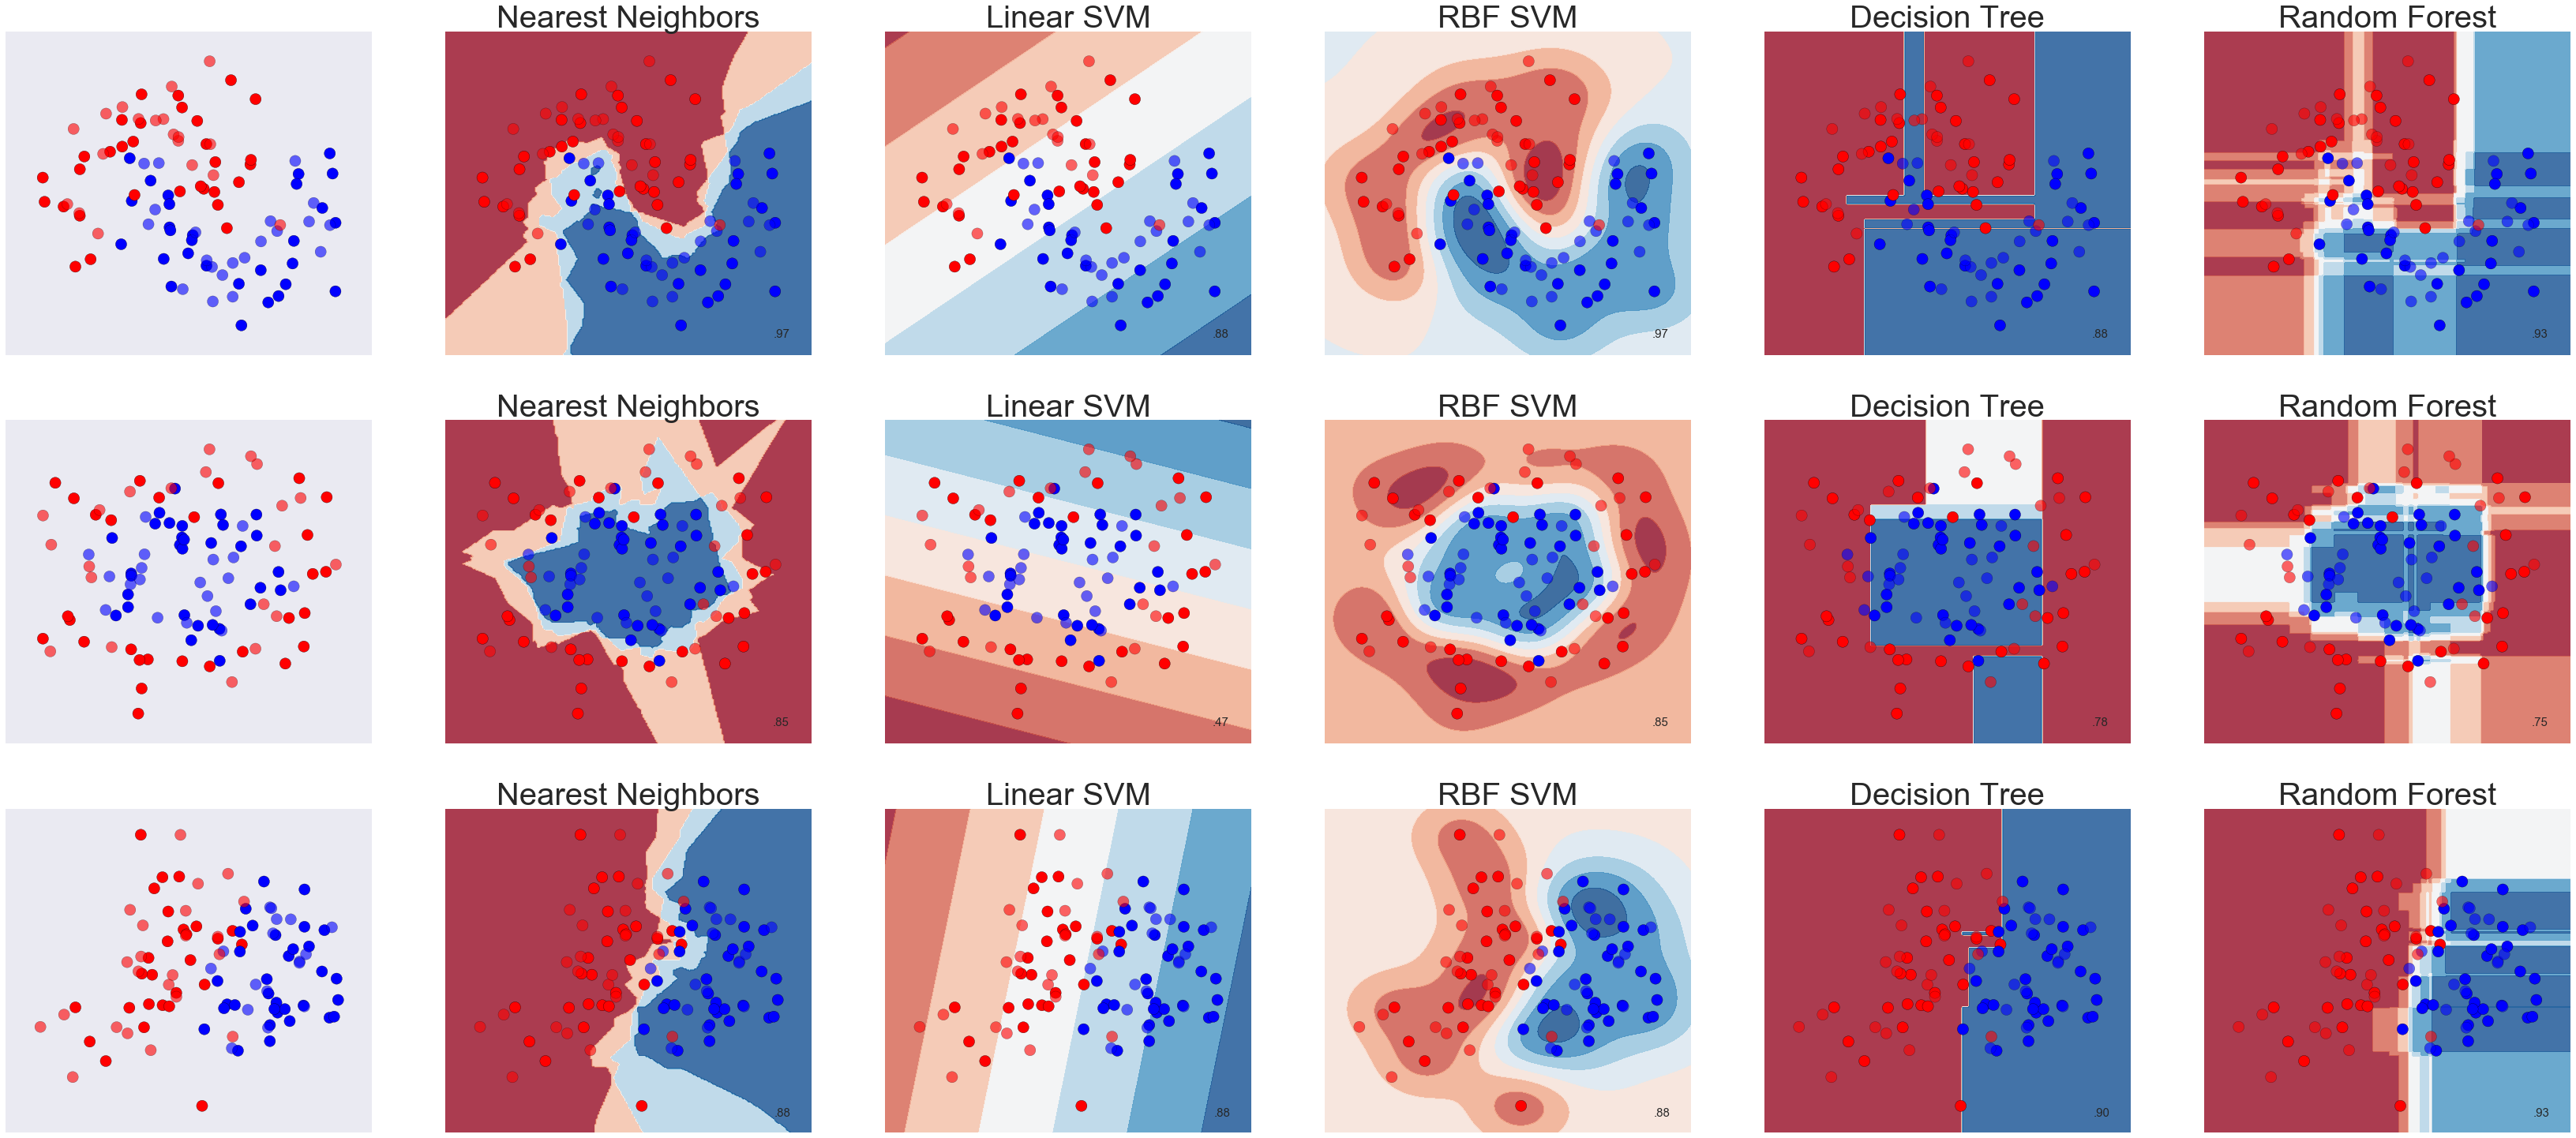

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#    AdaBoostClassifier(),
#    GaussianNB()
#    , LinearDiscriminantAnalysis(),
#    QuadraticDiscriminantAnalysis()
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(47, 25))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=200)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, s=200)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, s=200)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, s=200)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name, fontsize=40)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)